In [1]:
# Required Libraries
# -----------------------------
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk


# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# Step 1: Read TXT Dataset
# -----------------------------
with open(r"C:\Users\niran\Downloads\WhatsApp Chat with Tamil AI Data Science Community\WhatsApp Chat with Tamil AI Data Science Community .txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

In [3]:
# Join all lines into one string
text = " ".join(lines)

In [4]:
# 1. Convert to lowercase
text = text.lower()

In [5]:
# 2. Remove timestamps [12/09/2025, 10:15 PM] or similar
text = re.sub(r'\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s[ap]m)?\]', '', text)

# 3. Remove usernames (everything before colon like "John: hi")
text = re.sub(r'[^:]+:\s', '', text)

In [6]:
# 4. Remove punctuation, numbers, emojis
text = re.sub(r'[^a-z\s]', '', text)

# 5. Remove extra spaces
text = re.sub(r'\s+', ' ', text).strip()

In [7]:
words = word_tokenize(text)

In [8]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

In [11]:
# Word Frequency
word_freq = Counter(filtered_words)
print("Most Common Words:", word_freq.most_common(5))

Most Common Words: [('pm', 735), ('using', 721), ('link', 678), ('group', 663), ('joined', 640)]


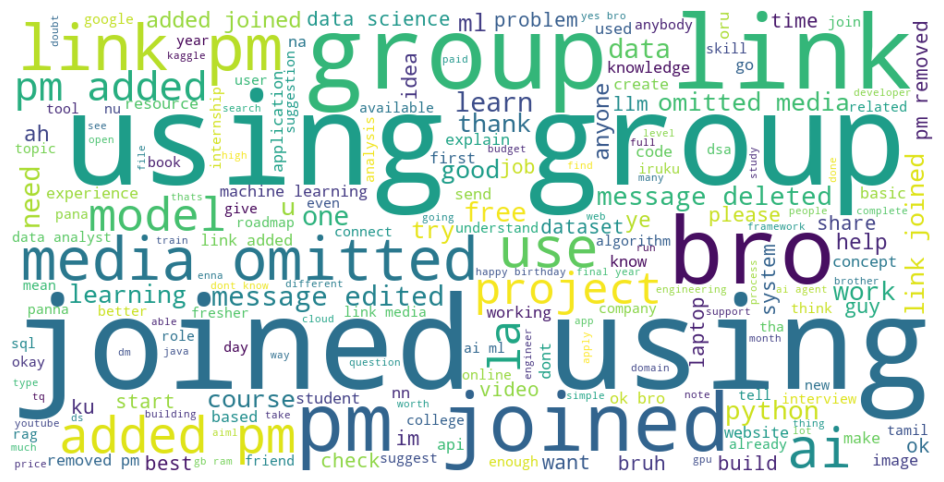

In [12]:
# Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Sentiment Analysis
blob = TextBlob(" ".join(filtered_words))
print("Sentiment Polarity:", blob.sentiment.polarity)
print("Sentiment Subjectivity:", blob.sentiment.subjectivity)

Sentiment Polarity: 0.23215976308938385
Sentiment Subjectivity: 0.48161864090041484


In [14]:
#Sentiment Polarity: 0.232  Range: -1 (very negative) → 0 (neutral) → +1 (very positive) Interpretation:0.232 is slightly positive.
#This means that overall, the text/chat has a mildly positive tone.
#Sentiment Subjectivity: 0.482 Range: 0 (objective/factual) → 1 (subjective/opinionated) Interpretation: 0.482 is moderately subjective. 
#The messages contain a mix of opinions and facts—roughly balanced.